# Вариант 7. Толщина кожной складки юношей/девушек первого курса.

Две категории данных из файла Volgmed_2013.xls 
(конкретные категории и данные выбрать в соответствии с вариантом) 
подвергнуть А/В тестированию:
- сравнить количество пропусков данных на основании точного теста Фишера;
- очистить от выбросов и пропусков и сравнить с помощью t-теста Уэлча;
- сравнить очищенные от выбросов и пропусков категории с помощью 
U-теста Манна—Уитни.
- Для каждого теста сформулировать, в какую сторону отличаются 
категории и с каким пи-значением.
- Вывести графики гистограмм и эмпирических функций распределения 
очищенных данных по категориям.

In [1]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
filepath = Path("Volgmed_2013.xlsx")

df_input = pd.read_excel(filepath, index_col=0, header=1)
df_input.head()

,Пол,Год рождения,Факультет,Курс,Группа,Год поступления,Дата обследования,"Рост, см","Вес, кг","Окружность грудной клетки в покое, см",...,"Гибкость, см","Время 10 хлопков, с","Прыжок в длину с места, см","Челночный бег, с","Силовой норматив, ед","Бег 100 м, с","Бег 2-3 км, мин","Статическая выносливость, с","Задержка дыхания, с","Равновесие, с"
№ п/п,,,,,,,,,,,,,,,,,,,,,
104.0,жен,1981.0,лечебный,1.0,NaN,1999,2000-05-01,176,74.5,90,...,22,6.6,155,26,38,17.7,8.7,140,59.0,90.0
104.0,жен,1981.0,лечебный,3.0,NaN,1999,2002-05-01,176,74,90,...,23,6.5,158,25,47,18.7,6.58,144,68.0,90.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_input.columns

Index(['Пол', 'Год рождения', 'Факультет', 'Курс', 'Группа', 'Год поступления',
       'Дата обследования', 'Рост, см', 'Вес, кг',
       'Окружность грудной клетки в покое, см',
       'Окружность грудной клетки на вдохе, см',
       'Окружность грудной клетки на выдохе, см',
       'Экскурсия грудной клетки, см', 'Толщина кожной складки, мм',
       'Сила правой руки, кг', 'Сила левой руки, кг', 'Становая сила, кг',
       'Гибкость, см', 'Время 10 хлопков, с', 'Прыжок в длину с места, см',
       'Челночный бег, с', 'Силовой норматив, ед', 'Бег 100 м, с',
       'Бег 2-3 км, мин', 'Статическая  выносливость, с',
       'Задержка дыхания, с', 'Равновесие, с'],
      dtype='object')

In [4]:
df = df_input[df_input["Курс"] == 1]
data = df[["Пол", "Толщина кожной складки, мм"]]
data.reset_index(drop=True, inplace=True)
data.rename(
    columns={"Пол": "sex", "Толщина кожной складки, мм": "thickness"}, inplace=True
)
data

,sex,thickness
0,жен,16
1,жен,11.5
2,жен,8.5
3,жен,13.5
4,жен,14.5
...,...,...
1045,муж,9
1046,муж,8
1047,муж,7
1048,муж,8


In [5]:
data.sex.value_counts()

sex
жен     741
муж     274
жен.     25
муж.      7
Name: count, dtype: int64

In [6]:
data

,sex,thickness
0,жен,16
1,жен,11.5
2,жен,8.5
3,жен,13.5
4,жен,14.5
...,...,...
1045,муж,9
1046,муж,8
1047,муж,7
1048,муж,8


In [7]:
data.dropna(subset=["sex"], inplace=True)
data

,sex,thickness
0,жен,16
1,жен,11.5
2,жен,8.5
3,жен,13.5
4,жен,14.5
...,...,...
1045,муж,9
1046,муж,8
1047,муж,7
1048,муж,8


In [8]:
data.sex = data.sex.replace({r"жен.*": "ж", r"муж.*": "м"}, regex=True)
data.sex.value_counts()

sex
ж    766
м    281
Name: count, dtype: int64

In [9]:
data.isna().sum()

sex           0
thickness    15
dtype: int64

In [10]:
thickness_na = data["thickness"].isna().map({True: "na", False: "notna"})
crosstab_result = pd.crosstab(thickness_na, data["sex"])

crosstab_result

sex,ж,м
thickness,,
na,9,6
notna,757,275


In [11]:
statistic, pvalue_fischer = stats.fisher_exact(crosstab_result)
print(statistic, pvalue_fischer)

0.5449141347424042 0.24884738946734614


Точный тест Фишера

Пропуски для юношей 1го курса: 6, \
Пропуски для девушек 1го курса: 9, \
Статистика: 0.5449 \
p-value: 0.24885.

In [12]:
# очистить столбец thickness от выбросов и пропусков
data = data[~data.thickness.isna()]

q1 = data.thickness.quantile(0.25)
q3 = data.thickness.quantile(0.75)
iqr = q3 - q1
data = data[(data.thickness >= q1 - 1.5 * iqr) & (data.thickness <= q3 + 1.5 * iqr)]

data

,sex,thickness
0,ж,16
1,ж,11.5
2,ж,8.5
3,ж,13.5
4,ж,14.5
...,...,...
1045,м,9
1046,м,8
1047,м,7
1048,м,8


In [13]:
data.sex.value_counts()

sex
ж    726
м    269
Name: count, dtype: int64

In [14]:
data_female = data[data.sex == "ж"].thickness.reset_index(drop=True).astype("float")
data_male = data[data.sex == "м"].thickness.reset_index(drop=True).astype("float")

print(data_female)
print(data_male)

0      16.0
1      11.5
2       8.5
3      13.5
4      14.5
       ... 
721    13.0
722     7.0
723    11.0
724     7.0
725    10.0
Name: thickness, Length: 726, dtype: float64
0      10.0
1       6.0
2      10.0
3      10.0
4       6.5
       ... 
264     9.0
265     8.0
266     7.0
267     8.0
268     6.0
Name: thickness, Length: 269, dtype: float64


In [15]:
statistic_welch, pvalue_welch = stats.ttest_ind(data_female, data_male, equal_var=False)
print(statistic_welch, pvalue_welch)

8.140414639207812 2.6917300738679255e-15


Тест Уэлча

Статистика: 8.14, \
p-value: 2.69 * 10^{-15}, \
Результат: среднее значение толщины кожной складки у всех юношей 1го курса меньше.

In [16]:
statistic_mannwhitney, p_value_mannwhitneyu = stats.mannwhitneyu(data_female, data_male)
print(statistic_mannwhitney, p_value_mannwhitneyu)

130539.5 2.3115147175417974e-16


U-тест Манна-Уитни

Статистика: 130539.5, \
p-value: 2.31 * 10*{-16}, \
Результат: медиана толщины кожной складки у всех юношей 1го курса меньше.

In [17]:
data.sex = data.sex.replace({"ж": "Девушки", "м": "Юноши"})
data.rename({"sex": "Пол", "thickness": "Толщина кожной складки, мм"}, axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)
data["Толщина кожной складки, мм"] = data["Толщина кожной складки, мм"].astype("float")
data

,Пол,"Толщина кожной складки, мм"
0,Девушки,16.0
1,Девушки,11.5
2,Девушки,8.5
3,Девушки,13.5
4,Девушки,14.5
...,...,...
990,Юноши,9.0
991,Юноши,8.0
992,Юноши,7.0
993,Юноши,8.0


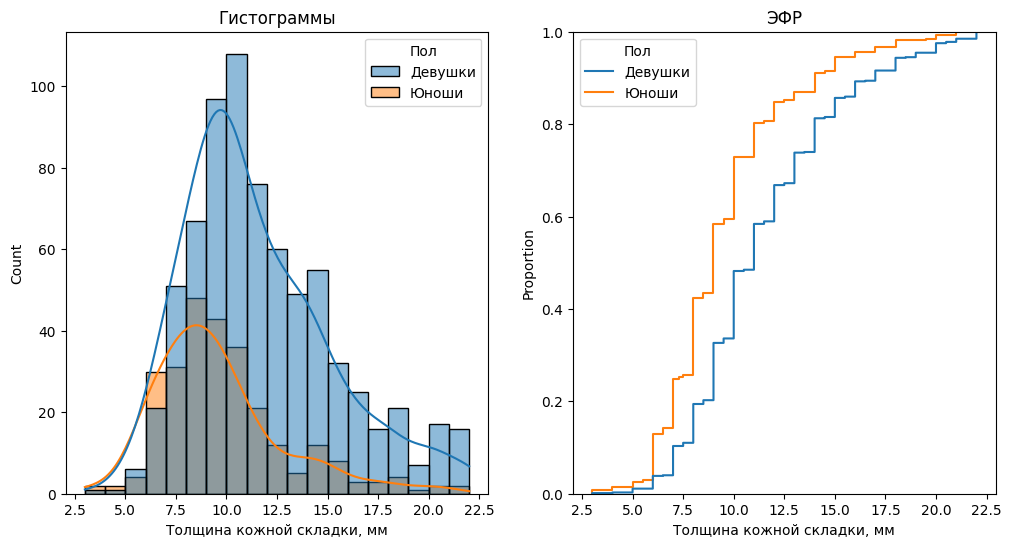

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, x="Толщина кожной складки, мм", hue="Пол", kde=True).set_title("Гистограммы")

plt.subplot(1, 2, 2)
sns.ecdfplot(data=data, x="Толщина кожной складки, мм", hue="Пол").set_title("ЭФР")

plt.show()